# 1.Random Walk

(a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)

(b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

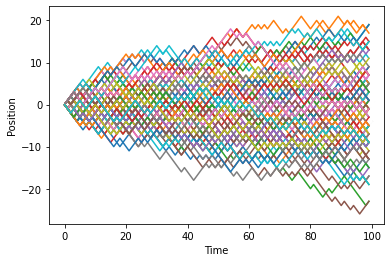

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy
from sympy import symbols
from sympy.plotting import plot


def RW(t) :
    x = 0
    time = np.arange(0,t)
    distance = [0]
    for i in time :
        if random.random() > 0.5 : x = x + 1
        else : 
            x = x - 1
        distance.append(x)
    return time , distance[:-1]

def graph (f,L,N) :
    for i in np.arange(0,L) :
        plt.plot(f(N)[0],f(N)[1])
        plt.xlabel("Time")
        plt.ylabel('Position')

graph(RW,100,100)

-0.0330124 49.67760418144628 7.048234117950842


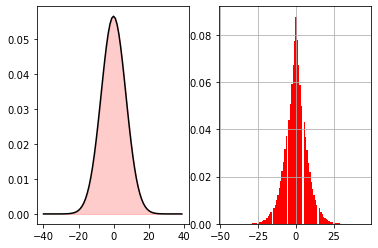

In [2]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
Data = []
for i in np.arange(100000) :
    Data += ((RW(100)[1]))
m = np.mean(Data)
v = np.var(Data)
std = np.std(Data)
print(m,v,std)
rv = norm(loc=m,scale=std)
x = np.arange(-40,40,1)
y = rv.pdf(x)

plt.subplot(1,2,1)
plt.plot(x,y,color="black")
plt.fill_between(x,y,alpha=0.2,color="red")
plt.subplot(1,2,2)
plt.hist(Data,bins=100,density = True,color="red")
plt.grid()


# 2. Bifurcation

다음으로 주어지는 미분방정식이 있다.
$$ \frac{dx}{dt}= rx-x^2. $$

#### (a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식) 
1. r=-1, x(0)=2
2. r=-1, x(0)=-2
3. r=1, x(0)=2
4. r=1, x(0)=-2

In [3]:
t = sympy.symbols('t')
r = sympy.symbols('r')
x = sympy.Function('x')

In [4]:
sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2))

Eq(Derivative(x(t), t), r*x(t) - x(t)**2)

In [5]:
sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)))

Eq(x(t), r*exp(r*(C1 + t))/(exp(r*(C1 + t)) - 1))

1. r=-1,x(0)=2

In [6]:
r = -1
sol1 = sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):2})
sol1

Eq(x(t), -2/(3*(2/3 - exp(t))))

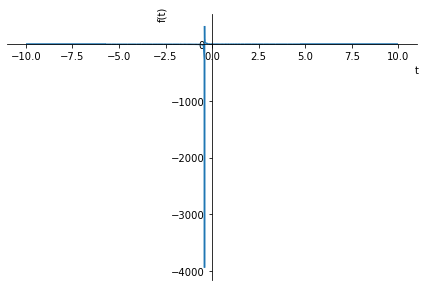

In [7]:
plot(sol1.rhs,(t,-10,10))

2. r=-1,x(0)=-2

In [8]:
r = -1
sol2 = sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):-2})
sol2

Eq(x(t), -2/(2 - exp(t)))

3. r=1, x(0)=2

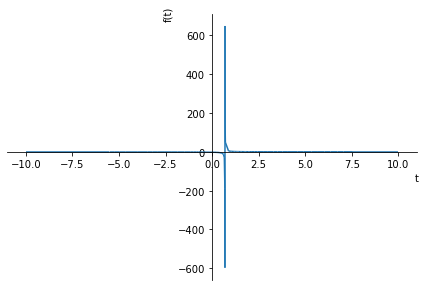

In [9]:
plot(sol2.rhs,(t,-10,10))

In [10]:
r = 1
sol3 = sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):2})
sol3

Eq(x(t), 1/(1 - exp(-t)/2))

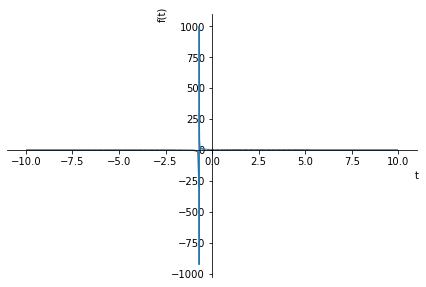

In [11]:
plot(sol3.rhs,(t,-10,10))

4.r=1, x(0)=-2

In [12]:
r = 1
sol4 = sympy.dsolve(sympy.Eq(x(t).diff(t),(r*x(t))-(x(t)**2)),ics={x(0):-2})
sol4

Eq(x(t), 1/(1 - 3*exp(-t)/2))

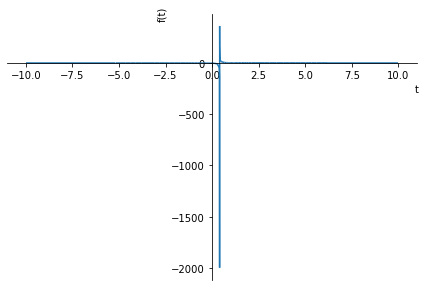

In [13]:
plot(sol4.rhs,(t,-10,10))

#### (b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라. 
$$ 0= rx -x^2. $$
1. r=-1
2. r=1

In [14]:
r = -1
x = sympy.symbols('x')
f = sympy.solve(r*x-x**2)
f


[-1, 0]

In [15]:
r = 1
f = sympy.solve(r*x-x**2)
f

[0, 1]